# Creación y evaluación del modelo.

In [1]:
# Imports basicos:
import pandas as pd
import numpy as np
import os

# Para leer los mensajes vectorizados.
from scipy import sparse

# Modelo "Multinomial Naive Bayes"
from sklearn.naive_bayes import MultinomialNB
# guardar y leer modelo
import joblib

# Metricas, evaluación de modelos.
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Antes de nada, leemos los mensajes vectorizados en el preprocessing.
x_train_tfidf = sparse.load_npz("../Data/dataset/vectorizado/tfidf_train.npz")

x_test_tfidf = sparse.load_npz("../Data/dataset/vectorizado/tfidf_test.npz")

y_train = pd.read_pickle("../Data/dataset/labels/y_train")

y_test = pd.read_pickle("../Data/dataset/labels/y_test")

x_test = pd.read_pickle("../Data/dataset/test/x_test")

## 1. Multinomial Naive Bayes 

In [3]:
nb = MultinomialNB()


nb.fit(x_train_tfidf, y_train)

MultinomialNB()

In [4]:
y_predicciones = nb.predict(x_test_tfidf)

In [5]:
metrics.accuracy_score(y_test, y_predicciones)

0.9698492462311558

Para evaluar un modelo, no solo hay que tener en cuenta la precisión del mismo. Es importante observar los falsos positivos y negativos.
La confusion matrix evalúa los resultados de la siguiente forma:

| negativos acertados 	| falsos negativos 	    |
|:-------------------:	|:--------------------:	|
| falsos positivos   	| positivos acertados 	|

En nuestro caso, es importante ver que el algoritmo favorece los falsos negativos. Esto es un error. Para la ciberseguridad, es mejor que determinar que un mensaje es spam cuando no lo es, que no detectar el spam en absoluto.

Esto puede estar causado porque el dataset no está balanceado y tiene mucho más spam que no-spam, de ahí que detecte perfectamente los mensajes reales y no haga tan buen trabajo con los de spam.

[IÑIGO: la parte de los metadatos no está añadida, pero practicamante resolvería el problema al añadir información clave. No me da tiempo a meterlo]

In [6]:
conf_matrix = metrics.confusion_matrix(y_test, y_predicciones)

conf_matrix

array([[1245,    0],
       [  42,  106]], dtype=int64)

Vamos a ver los falsos negativos.

In [7]:
falsos_negativos = x_test[y_predicciones < y_test]

In [8]:
falsos_negativos.head(5)

,len_mensajes,tiene_link,tiene_telefono,mensaje_limpio,spam_score
4200,0.159692,0,0,cmon babe make horni turn txt fantasi babe ho...,0.384615
3064,0.159692,0,1,hi babe jordan r home abroad lone text back wa...,0.307692
5462,0.159692,0,0,txt call claim reward hour talk time use ph...,0.307692
1895,0.169604,0,0,freemsg hey got videop fone repli wild txt i...,0.230769
3885,0.103524,1,0,link pictur sent also use,0.000000


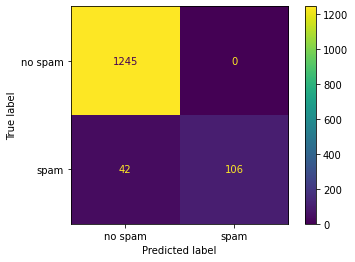

In [9]:
ConfusionMatrixDisplay(
    conf_matrix,
    display_labels=['no spam', 'spam']
    ).plot()

Guardamos el modelo.

In [10]:
path = '../Data/dataset/modelos'

if not os.path.exists(path):
    os.makedirs(path)

joblib.dump(nb, os.path.join(path,"MultinomialNB"))

['../Data/dataset/modelos\\MultinomialNB']